In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('combined_test.csv')

In [3]:
df.head()

,Unnamed: 0,account1,followers,post_count,post_link,location,long,lat,likes,description,time
0,0.0,iliasx_01,"1,797",10,_,Eguisheim,7.3079618,48.0447968,925 likes,"Eguisheim, France 🇫🇷\n\n➡️ Follow @iliasx_01 f...",2022-10-07T17:18:44.000Z
1,1.0,iliasx_01,"1,797",10,_,Colmar,7.3579641,48.0777517,761 likes,"Colmar, France 🇫🇷\n\n➡️ Follow @iliasx_01 for ...",2022-10-09T17:14:18.000Z
2,2.0,igers_drone_photography,"1,797",10,_,"Fira Santorini Island, Greece",_,_,508 likes,✈️@igers_drone_photography\nPresents the photo...,2022-10-10T05:59:44.000Z
3,3.0,iliasx_01,"1,797",10,_,"Strasbourg, France",7.7507127,48.584614,"1,098 likes","Strasburg, France 🇫🇷\n\n➡️ Follow @iliasx_01 f...",2022-10-06T16:41:00.000Z
4,4.0,iliasx_01,"1,797",10,_,"Oía, Kikladhes, Greece",_,_,"1,931 likes","Santorini, Greece 🇬🇷💙\n\n➡️ Follow @iliasx_01 ...",2022-10-05T17:39:27.000Z


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2402 entries, 0 to 2401
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2400 non-null   float64
 1   account1     2402 non-null   object 
 2   followers    2402 non-null   object 
 3   post_count   2402 non-null   object 
 4   post_link    2402 non-null   object 
 5   location     2402 non-null   object 
 6   long         2402 non-null   object 
 7   lat          2402 non-null   object 
 8   likes        2402 non-null   object 
 9   description  2402 non-null   object 
 10  time         2402 non-null   object 
dtypes: float64(1), object(10)
memory usage: 206.5+ KB


In [5]:
df=df.drop(['post_count','post_link','description'], axis=1)

In [6]:
df.head()

,Unnamed: 0,account1,followers,location,long,lat,likes,time
0,0.0,iliasx_01,"1,797",Eguisheim,7.3079618,48.0447968,925 likes,2022-10-07T17:18:44.000Z
1,1.0,iliasx_01,"1,797",Colmar,7.3579641,48.0777517,761 likes,2022-10-09T17:14:18.000Z
2,2.0,igers_drone_photography,"1,797","Fira Santorini Island, Greece",_,_,508 likes,2022-10-10T05:59:44.000Z
3,3.0,iliasx_01,"1,797","Strasbourg, France",7.7507127,48.584614,"1,098 likes",2022-10-06T16:41:00.000Z
4,4.0,iliasx_01,"1,797","Oía, Kikladhes, Greece",_,_,"1,931 likes",2022-10-05T17:39:27.000Z


In [7]:
df['likes']=[i.split(' ')[0].replace(',','') for i in df['likes']]

In [8]:
df.shape

(2402, 8)

In [9]:
df['likes']=[np.nan if not i.isdigit() else int(i) for i in df['likes']]


In [10]:
df['long']=df['long'].replace('_',np.nan)
df['lat']=df['lat'].replace('_',np.nan)
df['location']=df['location'].replace('_',np.nan)

In [11]:
df.isna().sum()

Unnamed: 0      2
account1        0
followers       0
location      578
long          903
lat           903
likes         321
time            0
dtype: int64

In [112]:
df = df[df['long'].notna()]

In [113]:
df.isna().sum()

Unnamed: 0      2
account1        0
followers       0
location        0
long            0
lat             0
likes         184
time            0
dtype: int64

In [114]:
# df=df.dropna()

In [115]:
df['location']=[str(i).split(', ')[-1] for i in df['location']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
no_unique = pd.DataFrame({'Variable': df.columns,
                               'Classes': [df[i].nunique() for i in df.columns]})

no_unique = no_unique.sort_values('Classes', ascending=False) #sort in descending order of number of unique values.
no_unique = no_unique.reset_index(drop = True) # reset the index back to the default 0, 1, 2 etc indexes.

In [117]:
no_unique

,Variable,Classes
0,time,1459
1,Unnamed: 0,1021
2,long,730
3,lat,730
4,likes,643
5,location,635
6,account1,54
7,followers,48


In [118]:
df['followers']=[i.replace(',','') for i in df['followers']]
df['followers']=[np.nan if not i.isdigit() else int(i) for i in df['followers']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 0 to 2395
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1497 non-null   float64
 1   account1    1499 non-null   object 
 2   followers   1497 non-null   float64
 3   location    1499 non-null   object 
 4   long        1499 non-null   object 
 5   lat         1499 non-null   object 
 6   likes       1315 non-null   float64
 7   time        1499 non-null   object 
dtypes: float64(3), object(5)
memory usage: 105.4+ KB


In [130]:
# df.iloc[621][4]
# df=df.drop([df.index[621],df.index[696]])
# df=df.drop([df.index[695]])
df['long'] = pd.to_numeric(df['long'])
df['lat'] = pd.to_numeric(df['lat'])

In [124]:
df

,Unnamed: 0,account1,followers,location,long,lat,likes,time
0,0.0,iliasx_01,1797.0,Eguisheim,7.3079618,48.0447968,925.0,2022-10-07T17:18:44.000Z
1,1.0,iliasx_01,1797.0,Colmar,7.3579641,48.0777517,761.0,2022-10-09T17:14:18.000Z
3,3.0,iliasx_01,1797.0,France,7.7507127,48.584614,1098.0,2022-10-06T16:41:00.000Z
7,7.0,iliasx_01,1797.0,Οία,25.3757257,36.4622122,1548.0,2022-10-02T16:30:04.000Z
8,8.0,iliasx_01,1797.0,Ios island Greece,25.33311211846154,36.7173281,1308.0,2022-09-30T16:41:04.000Z
...,...,...,...,...,...,...,...,...
2390,1238.0,meilin0823,317.0,Night MOoD,123.96884936944369,10.381203849999999,NaN,2021-03-28T20:03:20.000Z
2392,1240.0,meilin0823,317.0,France,2.3200410217200766,48.8588897,NaN,2021-03-17T21:32:49.000Z
2393,1241.0,meilin0823,317.0,France,2.3200410217200766,48.8588897,NaN,2021-03-09T20:14:14.000Z
2394,1242.0,meilin0823,317.0,France,2.3200410217200766,48.8588897,NaN,2021-02-26T19:32:25.000Z


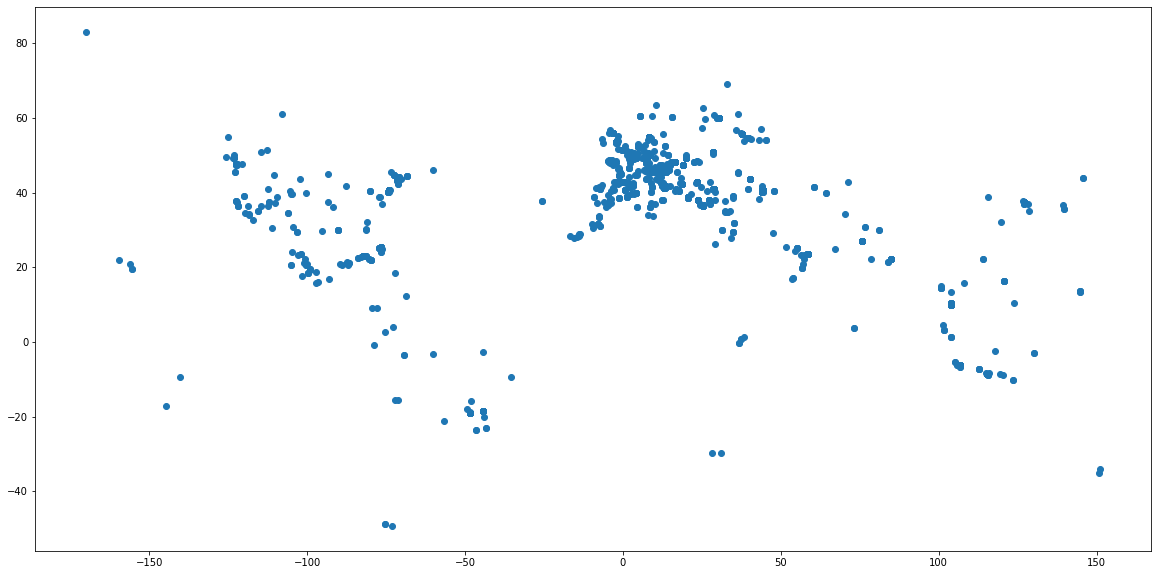

In [131]:


plt.figure(figsize=(20,10))
x = df['long']
y=df['lat']

plt.scatter(x, y)
plt.show()

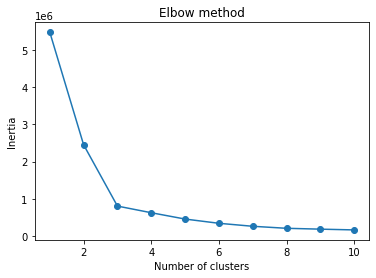

In [132]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [161]:
no_unique = pd.DataFrame({'Variable': df.columns,
                               'Classes': [df[i].nunique() for i in df.columns]})

no_unique = no_unique.sort_values('Classes', ascending=False) #sort in descending order of number of unique values.
no_unique = no_unique.reset_index(drop = True) # reset the index back to the default 0, 1, 2 etc indexes.

In [162]:
no_unique

,Variable,Classes
0,time,1458
1,Unnamed: 0,1021
2,long,729
3,lat,729
4,likes,643
5,location,634
6,account1,53
7,followers,47


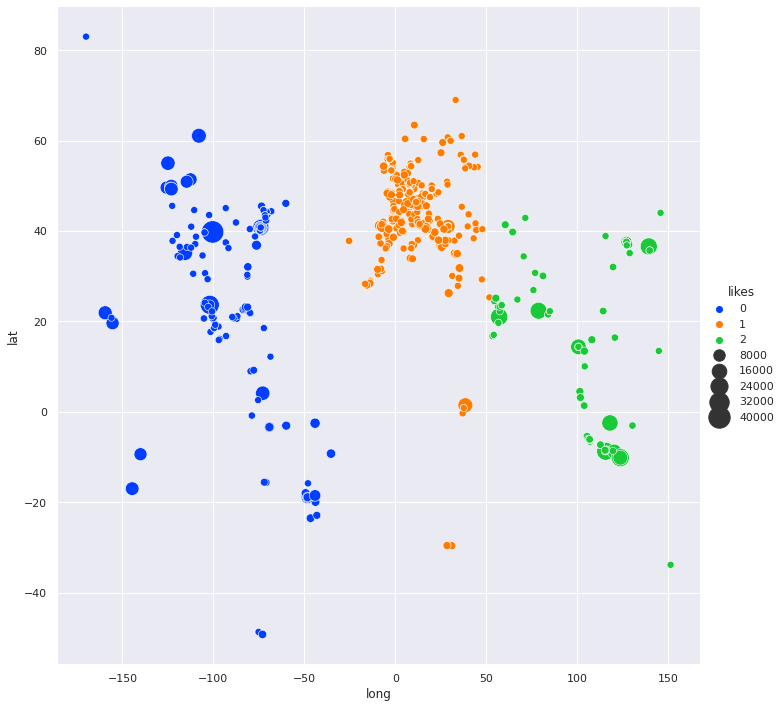

In [167]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)


# sns.set(rc={'figure.figsize':(15,10)})
sns.relplot(x=x, y=y, hue=kmeans.labels_, size=df['likes'], height=10, sizes=(50,300), markers=True,legend='auto',palette=sns.color_palette("bright", 3))
plt.show()

In [168]:
df.isna().sum()


Unnamed: 0      0
account1        0
followers       0
location        0
long            0
lat             0
likes         182
time            0
dtype: int64

In [169]:
df = df[df['likes'].notna()]

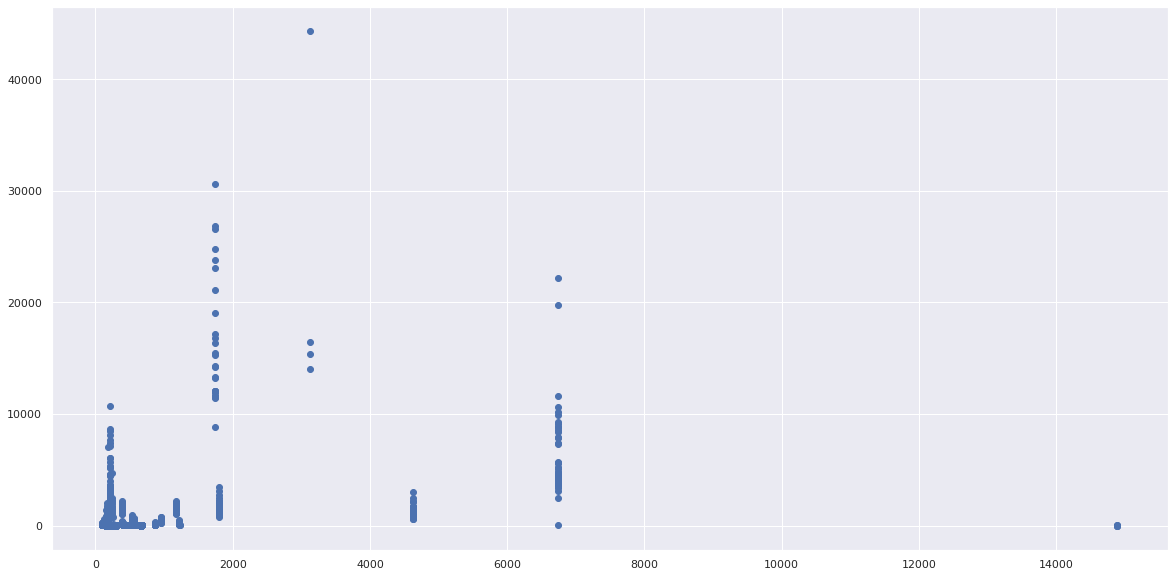

In [170]:
plt.figure(figsize=(20,10))
x = df['followers']
y=df['likes']

plt.scatter(x, y)
plt.show()

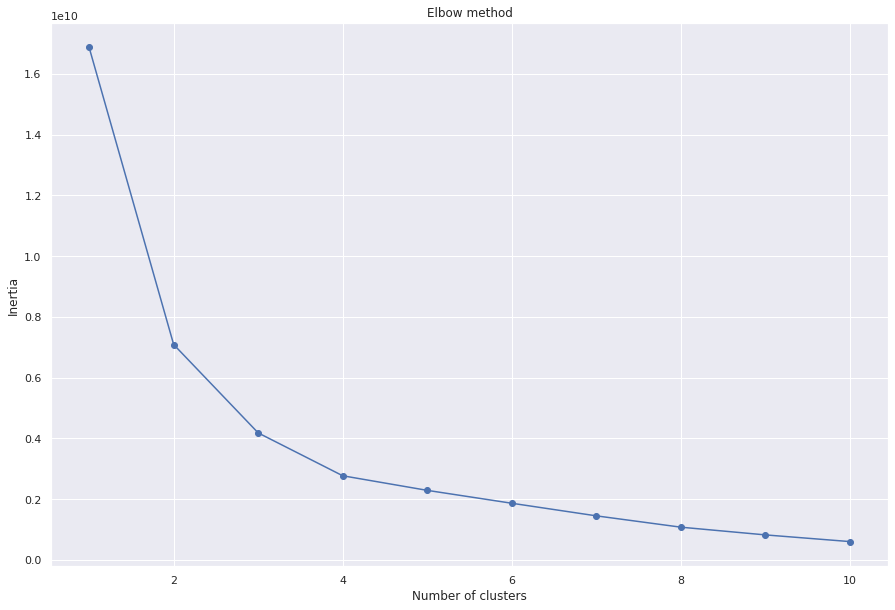

In [171]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

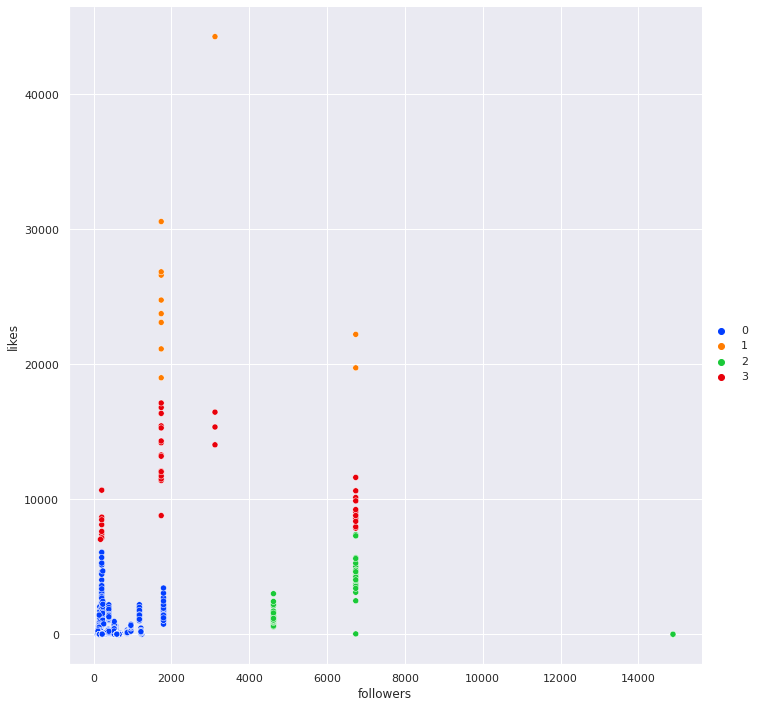

In [175]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)


# sns.set(rc={'figure.figsize':(15,10)})
sns.relplot(x=x, y=y, hue=kmeans.labels_, height=10, sizes=(50,500), markers=True,legend='auto',palette=sns.color_palette("bright", 4))
plt.show()

In [177]:
max_loc=['Rajasthan','Bulgaria','Sylt - Die Insel','Turkey','New York','United Kingdom','France','Korea','Austria','Spain','Armenia','Bretagne','Kent','Germany','Indonesia','Etxarri-Aranatz','Greece']
df = df[df.location.isin(max_loc)]

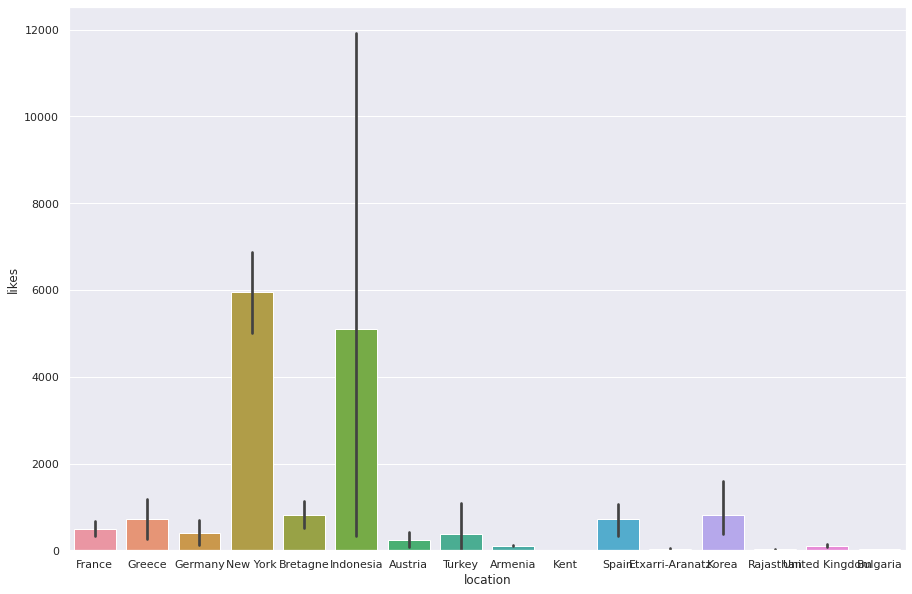

In [189]:
sns.barplot(x=df['location'],y=df['likes'])